# Linear Regression

A simple linear regression model consists of one independent variable and one dependent variable and finds a linear function (a straight line) that **predicts** (or approximates) the dependent variable as a function of the independent variable.

The line is fitted to the data such that the error between the predictions and the training data (the **loss**) is as small as possible.

A linear function basically multiplies data with a weight and adds a bias term.

For a simple line, that is

```
y = wx + b
```

where `w` is the weight and `b` is the bias term. Those two values are the **parameters** of the model.

For doing the calculations, the [PyTorch](https://pytorch.org/) library will be used.

## Import required modules

In [21]:
import torch
import numpy as np
from torch.nn import functional as F
import pandas as pd
from torch import nn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## Define independent and dependent variables

```
X: independent variable
Y: dependent variable
```

In [10]:
X = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]).reshape(-1, 1)
Y = np.array([0.1, 2.1, 1.6, 3.2, 5.1, 7.3, 6.2, 7.1]).reshape(-1, 1)

## Plot data

In this scatter plot, we can see X-Y pairs.

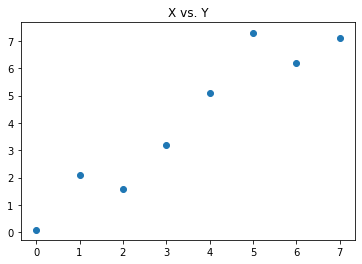

In [11]:
plt.title('X vs. Y')
plt.scatter(x=X, y=Y);

## Define a linear regression class

In the class constructor `__init__`, a fully connected layer of a neural network is defined.

In the `forward` function, the model is applied to input data.

We will look at the details in a later example. For the moment just keep in mind that the model will learn and store the weight and the bias that defines the line that approximates data points just by looking at the data.

In [12]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

Now let's create an instance of the `LinearRegression` class.

In [13]:
model = LinearRegression(input_dim=1, output_dim=1)

## Training

In the next two lines, the **loss function** (for calculating the prediction error) and the **optimizer** (the algorithm that actually fits the line to the data) is created. The optimizer will be used in the **training loop** (see below).

In [41]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)

In order to be able to use the data in the PyTorch framework, the NumPy data has to be transformed to the data structure that is used in PyTorch (so-called **tensors**).

In [42]:
X_train = torch.tensor(X, dtype=torch.float32)
Y_train = torch.tensor(Y, dtype=torch.float32)

Now, we can move on to the training loop.

Training a model basically consists of these steps: 
- start with an initial estimate for the parameters of the model

Then, in a loop
- based on the current parameter estimate, calculate the predictions on the independent training variables
- calculate sum of errors between the predictions and the actual dependent training data points
- slightly change the parameter estimate such that the error becomes smaller

We will see in a later example how the parameter update works in detail.

$$
loss = 
$$


In [43]:
NUM_EPOCHS = 100

for epoch in range(NUM_EPOCHS):

    # zero all gradients
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, Y_train)
    
    # backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if epoch%20==0: 
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.64
Epoch: 20 | loss: 0.65
Epoch: 40 | loss: 0.64
Epoch: 60 | loss: 0.64
Epoch: 80 | loss: 0.64


In [45]:
(model.linear.weight, model.linear.bias)

(Parameter containing:
 tensor([[1.0530]], requires_grad=True),
 Parameter containing:
 tensor([0.3995], requires_grad=True))

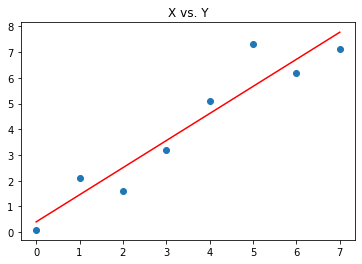

In [46]:
x = torch.arange(0.0, 8.0).reshape(-1, 1)
y = model(x)
y = y.detach().numpy()

plt.title('X vs. Y')
plt.scatter(x=X_train, y=Y_train)
plt.plot(x, y, 'r');

In [3]:
data = pd.read_csv('data/startup.csv')
data.head()

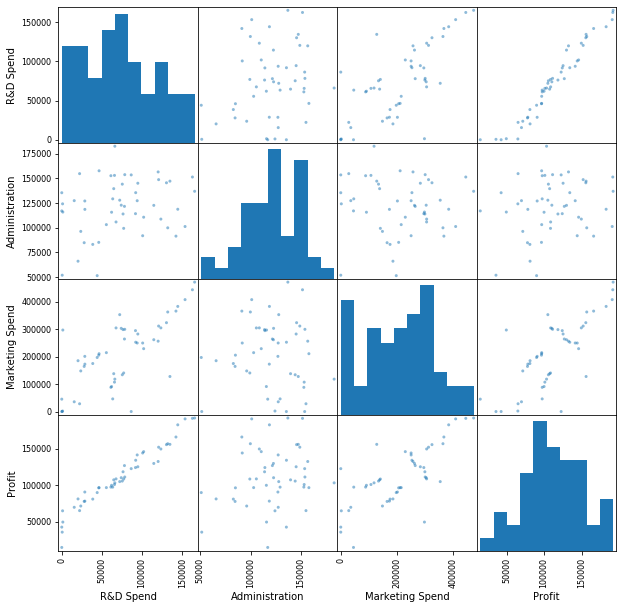

In [16]:
pd.plotting.scatter_matrix(data, figsize=(10,10));

In [36]:
X = data.drop(['Profit'], axis = 1)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

X = ct.fit_transform(X)
y = data[['Profit']].values

In [37]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
SHUFFLE = True
def split(X, y, val_size, test_size, shuffle):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = shuffle)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, shuffle = shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, VAL_SIZE, TEST_SIZE, SHUFFLE)

In [42]:
x_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [44]:
X_train = x_scaler.transform(X_train)
y_train = y_scaler.transform(y_train).reshape(-1, 1)
X_val = x_scaler.transform(X_val)
y_val = y_scaler.transform(y_val).reshape(-1, 1)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test).reshape(-1, 1)

In [45]:
INPUT_DIM = X_train.shape[1] # size of input 
OUTPUT_DIM = y_train.shape[1] # size of output sample

In [54]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [55]:
model = LinearRegression(input_dim = INPUT_DIM, output_dim = OUTPUT_DIM)

In [57]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)

In [58]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [66]:
NUM_EPOCHS = 100

for epoch in range(NUM_EPOCHS):

    # zero all gradients
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)
    
    # backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if epoch%20==0: 
        print (f"Epoch: {epoch} | loss: {loss:.2f}")

Epoch: 0 | loss: 0.00
Epoch: 20 | loss: 0.00
Epoch: 40 | loss: 0.00
Epoch: 60 | loss: 0.00
Epoch: 80 | loss: 0.00


In [63]:
tr_pred = model(X_train)
te_pred = model(X_test)

In [ ]:
tr_error = loss_fn(tr_pred, y_train)
te_error = loss_fn(te_pred, y_test)
print(f'train_error: {tr_error:.2f}')
print(f'test_error: {te_error:.2f}')